In [29]:
import numpy as np
from BKG_Dataholder import BKG_dataholder
import matplotlib.pyplot as plt
import os
import tables as t
from datetime import datetime


%matplotlib inline

In [30]:
BEAM_PATH = "/home/mirksonius/Desktop/Fill_info/beam/"
COLLIMATOR_PATH = "/home/mirksonius/Desktop/Fill_info/collimators/"
VACUUM_PATH = "/home/mirksonius/Desktop/Fill_info/vacuum/"
FILL_PATH = "/home/mirksonius/Desktop/22_fills/"
FILL_NUMBER = 7921

vac_vars = [
    "VGI.183.1L5.X.PR",
    "VGI.183.1R5.X.PR",
    "VGI.220.1L5.X.PR",
    "VGI.220.1R5.X.PR"]

files = os.listdir(FILL_PATH + str(FILL_NUMBER))

In [31]:
bkg = BKG_dataholder(
                    fill_path = FILL_PATH,
                    fill_number = FILL_NUMBER,
                    beam_path = BEAM_PATH,
                    collimator_path = COLLIMATOR_PATH,
                    vacuum_path= VACUUM_PATH  
                                   )

bkg.get_beam_data()
bkg.get_fill_data()


Opening file 7963_355400_2207110026_2207110026.hd5
File 7963_355400_2207110026_2207110026.hd5 starts at 2022-07-11 00:26:58 and ends at 2022-07-11 00:29:49
Opening file 7963_355401_2207110026_2207110112.hd5
File 7963_355401_2207110026_2207110112.hd5 starts at 2022-07-11 01:10:27 and ends at 2022-07-11 01:13:57
Opening file 7963_355402_2207110112_2207110145.hd5
File 7963_355402_2207110112_2207110145.hd5 starts at 2022-07-11 01:13:59 and ends at 2022-07-11 01:49:08
Opening file 7963_355403_2207110145_2207110205.hd5
File 7963_355403_2207110145_2207110205.hd5 starts at 2022-07-11 01:49:11 and ends at 2022-07-11 02:08:07
Opening file 7963_355404_2207110205_2207110924.hd5
File 7963_355404_2207110205_2207110924.hd5 starts at 2022-07-11 02:08:09 and ends at 2022-07-11 09:26:38
Opening file 7963_355405_2207110924_2207110931.hd5
File 7963_355405_2207110924_2207110931.hd5 starts at 2022-07-11 09:26:35 and ends at 2022-07-11 09:35:09
Opening file 7963_355406_2207110931_2207110942.hd5
File 7963_355

In [32]:
print("Non colliding beam 1: ",bkg.noncolliding1)
print("Non colliding beam 2: ",bkg.noncolliding2)
print("Colliding: ",bkg.colliding_bunches)
colliding = bkg.colliding_bunches
for i in range(len(colliding)-1):
    if colliding[i+1]-colliding[i]>1:
        print(colliding[i])
print(bkg.empty_bunches)

Non colliding beam 1:  [287 288 289 290 291 292 293 294 295 296 297 298 914]
Non colliding beam 2:  [734 735 736 737 738 739 740 741 742 743 744 745 911]
Colliding:  [  20 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1628
 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1805 2063 2064
 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2522 2523 2524 2525
 2526 2527 2528 2529 2530 2531 2532 2533 2957 2958 2959 2960 2961 2962
 2963 2964 2965 2966 2967 2968]
20
1180
1639
1805
2074
2533
[   0    1    2 ... 3561 3562 3563]


In [33]:
hits_in_empty = np.zeros(len(bkg.empty_bunches),dtype = "float32")

for name in files:
    print("Opening file: ",name)
    with t.open_file(FILL_PATH + str(FILL_NUMBER)+"/" + name,'r') as f:
        for row in f.root.bcm1flumi.iterrows():
            hits_in_empty += row["bxraw"][bkg.empty_bunches]


Opening file:  7963_355400_2207110026_2207110026.hd5
Opening file:  7963_355401_2207110026_2207110112.hd5
Opening file:  7963_355402_2207110112_2207110145.hd5
Opening file:  7963_355403_2207110145_2207110205.hd5
Opening file:  7963_355404_2207110205_2207110924.hd5
Opening file:  7963_355405_2207110924_2207110931.hd5
Opening file:  7963_355406_2207110931_2207110942.hd5
Opening file:  7963_355407_2207110942_2207111003.hd5
Opening file:  7963_355408_2207111003_2207111017.hd5
Opening file:  7963_355409_2207111017_2207111021.hd5
Opening file:  7963_355410_2207111021_2207111028.hd5
Opening file:  7963_355411_2207111028_2207111038.hd5
Opening file:  7963_355414_2207111038_2207111046.hd5
Opening file:  7963_355415_2207111046_2207111053.hd5
Opening file:  7963_355417_2207111053_2207111103.hd5
Opening file:  7963_355418_2207111103_2207111121.hd5
Opening file:  7963_355419_2207111121_2207111209.hd5


(-1.0, 1.0)

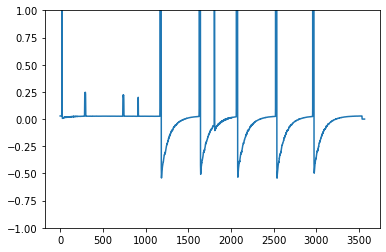

In [37]:
plt.plot(hits_in_empty)
#plt.yscale("log")


In [35]:
probe1 = 0
probe2 = 1785
probe3 = 1


bxraw = np.zeros(3564)
bx = np.zeros(3564)

for file in files:
	h5 = t.open_file(FILL_PATH+ str(FILL_NUMBER)+'/'+file)
	for row in h5.root.bcm1flumi.iterrows():
		bxraw += row['bxraw']
		bx += row['bx']
	h5.close()

KeyboardInterrupt: 

In [ ]:
plt.plot(bxraw)
plt.yscale("log")

NameError: name 'bxraw' is not defined